In [1]:
import os 
import time
import torch 
import torch.nn as nn 
import numpy as np
import matplotlib.pyplot as plt 

from train_mlp_ae import * 
from trainer import AE_Trainer
from mlp_ae import MLPVAE, MLP_VQVAE, vae_loss, vqvae_loss



# MLP AE Hyperparameter Sweep

In [2]:
src_dir = "/home/horowitz3/latent-diffusion_project/datasets/three_piece_assembly_latent_actions/buf.pkl"
n_test = 2 
n_val = 10
ac_chunk = 30
obs_dim = [11, 1]
ac_dim = [30, 7]
batch_size = 50
action_dataset = LatentActionBuffer(src_dir, 
                                            n_test,
                                            n_val, 
                                            mode="train",
                                            obs_dim=obs_dim, 
                                            ac_chunk = ac_chunk, 
                                            ac_dim = ac_dim)
val_action_dataset = LatentActionBuffer(src_dir, 
                                            n_test,
                                            n_val,
                                            mode="val", 
                                            obs_dim=obs_dim, 
                                            ac_chunk = ac_chunk, 
                                            ac_dim = ac_dim)
test_action_dataset = LatentActionBuffer(src_dir, 
                                            n_test,
                                            n_val,
                                            mode="test", 
                                            obs_dim=obs_dim, 
                                            ac_chunk = ac_chunk, 
                                            ac_dim = ac_dim) 

train_loader = DataLoader(action_dataset, 
                                  batch_size = batch_size, 
                                  shuffle = True, 
                                  num_workers=10)
val_loader = DataLoader(val_action_dataset, 
                                  batch_size = batch_size, 
                                  shuffle = True, 
                                  num_workers=10) 
test_loader = DataLoader(test_action_dataset, 
                                  batch_size = batch_size, 
                                  shuffle = True, 
                                  num_workers=10) 

100
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


100%|██████████| 100/100 [00:00<00:00, 189.56it/s]


100
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


100%|██████████| 100/100 [00:00<00:00, 236.66it/s]


100
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


100%|██████████| 100/100 [00:00<00:00, 243.33it/s]


In [3]:
model_type = "MLPVAE"
obs_dim = [11, 1]
ac_dim = [30, 7]
latent_dim = 60
hidden = [180, 90, 60]
model = MLPVAE(obs_dim, ac_dim, latent_dim, hidden)
loss_fn = vae_loss
save_dir = "lr_sweep"
optim_params = {"log_freq": 100,
                "save_freq": 1000,
                "epochs": 20}

learning_rates = [0.1, 0.01, 0.001, 1e-4, 1e-5]
for lr in learning_rates:
    optim_params["lr"] = lr
    trainer = AE_Trainer(model, 
                         loss_fn, 
                         "cuda:0", 
                         optim_params, 
                         f"lr_sweep_{lr}")
    trainer.train_loop(train_loader, val_loader)


{'log_freq': 100, 'save_freq': 1000, 'epochs': 20, 'lr': 0.1}
{'log_freq': 100, 'save_freq': 1000, 'epochs': 20, 'lr': 0.01}
{'log_freq': 100, 'save_freq': 1000, 'epochs': 20, 'lr': 0.001}
{'log_freq': 100, 'save_freq': 1000, 'epochs': 20, 'lr': 0.0001}
{'log_freq': 100, 'save_freq': 1000, 'epochs': 20, 'lr': 1e-05}


## Batch Size Tuning


In [4]:
src_dir = "/home/horowitz3/latent-diffusion_project/datasets/three_piece_assembly_latent_actions/buf.pkl"
n_test = 2 
n_val = 10
ac_chunk = 30
obs_dim = [11, 1]
ac_dim = [30, 7]
action_dataset = LatentActionBuffer(src_dir, 
                                            n_test,
                                            n_val, 
                                            mode="train",
                                            obs_dim=obs_dim, 
                                            ac_chunk = ac_chunk, 
                                            ac_dim = ac_dim)
val_action_dataset = LatentActionBuffer(src_dir, 
                                            n_test,
                                            n_val,
                                            mode="val", 
                                            obs_dim=obs_dim, 
                                            ac_chunk = ac_chunk, 
                                            ac_dim = ac_dim)
test_action_dataset = LatentActionBuffer(src_dir, 
                                            n_test,
                                            n_val,
                                            mode="test", 
                                            obs_dim=obs_dim, 
                                            ac_chunk = ac_chunk, 
                                            ac_dim = ac_dim) 

model_type = "MLPVAE"
obs_dim = [11, 1]
ac_dim = [30, 7]
latent_dim = 60
hidden = [180, 90, 60]
model = MLPVAE(obs_dim, ac_dim, latent_dim, hidden)
loss_fn = vae_loss
save_dir = "lr_sweep"
optim_params = {"log_freq": 100,
                "save_freq": 1000,
                "epochs": 20,
                "lr": 0.001}


    

batch_sizes = [10, 20, 50, 100, 150]

for size in batch_sizes:
    train_loader = DataLoader(action_dataset, 
                                    batch_size = batch_size, 
                                    shuffle = True, 
                                    num_workers=10)
    val_loader = DataLoader(val_action_dataset, 
                                    batch_size = batch_size, 
                                    shuffle = True, 
                                    num_workers=10) 
    test_loader = DataLoader(test_action_dataset, 
                                    batch_size = batch_size, 
                                    shuffle = True, 
                                    num_workers=10) 
    trainer = AE_Trainer(model, 
                         loss_fn, 
                         "cuda:0", 
                         optim_params, 
                         f"batch_size_sweep_{size}")
    trainer.train_loop(train_loader, val_loader)

100
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


100%|██████████| 100/100 [00:00<00:00, 239.73it/s]


100
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


100%|██████████| 100/100 [00:00<00:00, 163.41it/s]


100
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


100%|██████████| 100/100 [00:00<00:00, 225.42it/s]


{'log_freq': 100, 'save_freq': 1000, 'epochs': 20, 'lr': 0.001}
{'log_freq': 100, 'save_freq': 1000, 'epochs': 20, 'lr': 0.001}
{'log_freq': 100, 'save_freq': 1000, 'epochs': 20, 'lr': 0.001}
{'log_freq': 100, 'save_freq': 1000, 'epochs': 20, 'lr': 0.001}
{'log_freq': 100, 'save_freq': 1000, 'epochs': 20, 'lr': 0.001}


## Architectural Sweep

In [3]:
src_dir = "/home/horowitz3/latent-diffusion_project/datasets/three_piece_assembly_latent_actions/buf.pkl"
n_test = 2 
n_val = 10
ac_chunk = 30
obs_dim = [11, 1]
ac_dim = [30, 7]
batch_size = 50
action_dataset = LatentActionBuffer(src_dir, 
                                            n_test,
                                            n_val, 
                                            mode="train",
                                            obs_dim=obs_dim, 
                                            ac_chunk = ac_chunk, 
                                            ac_dim = ac_dim)
val_action_dataset = LatentActionBuffer(src_dir, 
                                            n_test,
                                            n_val,
                                            mode="val", 
                                            obs_dim=obs_dim, 
                                            ac_chunk = ac_chunk, 
                                            ac_dim = ac_dim)
test_action_dataset = LatentActionBuffer(src_dir, 
                                            n_test,
                                            n_val,
                                            mode="test", 
                                            obs_dim=obs_dim, 
                                            ac_chunk = ac_chunk, 
                                            ac_dim = ac_dim) 

train_loader = DataLoader(action_dataset, 
                                  batch_size = batch_size, 
                                  shuffle = True, 
                                  num_workers=10)
val_loader = DataLoader(val_action_dataset, 
                                  batch_size = batch_size, 
                                  shuffle = True, 
                                  num_workers=10) 
test_loader = DataLoader(test_action_dataset, 
                                  batch_size = batch_size, 
                                  shuffle = True, 
                                  num_workers=10) 

100
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
Mode: train, Index list length: 88


100%|██████████| 88/88 [00:00<00:00, 172.90it/s]


100
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
Mode: val, Index list length: 10


100%|██████████| 10/10 [00:00<00:00, 257.51it/s]


100
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
Mode: test, Index list length: 2


100%|██████████| 2/2 [00:00<00:00, 242.96it/s]


In [2]:
model_type = "MLPVAE"
obs_dim = [11, 1]
ac_dim = [30, 7]
latent_dim = 60
hiddens = [[180, 90, 60],[220, 110, 55 ],[70, 35, 35],[160, 40, 20],[200, 150, 100]]

loss_fn = vae_loss
save_dir = "lr_sweep"
optim_params = {"log_freq": 100,
                "save_freq": 1000,
                "epochs": 20,
                "lr": 0.001}

for i,hidden in enumerate(hiddens):
    model = MLPVAE(obs_dim, ac_dim, hidden[-1], hidden)
    trainer = AE_Trainer(model, 
                         loss_fn, 
                         "cuda:0", 
                         optim_params, 
                         f"arch_sweep_{i}")
    trainer.train_loop(train_loader, val_loader)
    

{'log_freq': 100, 'save_freq': 1000, 'epochs': 20, 'lr': 0.001}


NameError: name 'train_loader' is not defined

In [4]:
src_dir = "/home/horowitz3/latent-diffusion_project/datasets/three_piece_assembly_latent_actions/buf.pkl"
n_test = 2 
n_val = 10
ac_chunk = 30
obs_dim = [11, 1]
ac_dim = [30, 7]
batch_size = 50
action_dataset = LatentActionBuffer(src_dir, 
                                            n_test,
                                            n_val, 
                                            mode="train",
                                            obs_dim=obs_dim, 
                                            ac_chunk = ac_chunk, 
                                            ac_dim = ac_dim)
val_action_dataset = LatentActionBuffer(src_dir, 
                                            n_test,
                                            n_val,
                                            mode="val", 
                                            obs_dim=obs_dim, 
                                            ac_chunk = ac_chunk, 
                                            ac_dim = ac_dim)
test_action_dataset = LatentActionBuffer(src_dir, 
                                            n_test,
                                            n_val,
                                            mode="test", 
                                            obs_dim=obs_dim, 
                                            ac_chunk = ac_chunk, 
                                            ac_dim = ac_dim) 

train_loader = DataLoader(action_dataset, 
                                  batch_size = batch_size, 
                                  shuffle = True, 
                                  num_workers=10)
val_loader = DataLoader(val_action_dataset, 
                                  batch_size = batch_size, 
                                  shuffle = True, 
                                  num_workers=10) 
test_loader = DataLoader(test_action_dataset, 
                                  batch_size = batch_size, 
                                  shuffle = True, 
                                  num_workers=10) 

model_type = "MLPVAE"
obs_dim = [11, 1]
ac_dim = [30, 7]
latent_dim = 55
hidden = [220, 110, 55 ]
model = MLPVAE(obs_dim, ac_dim, latent_dim, hidden)
loss_fn = vae_loss
save_dir = "lr_sweep"
optim_params = {"log_freq": 100,
                "save_freq": 1000,
                "epochs": 200, 
                "lr": 0.001}

trainer = AE_Trainer(model, 
                         loss_fn, 
                         "cuda:0", 
                         optim_params, 
                         f"tuned_mlp_vae")
trainer.train_loop(train_loader, val_loader)



100
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
Mode: train, Index list length: 88


100%|██████████| 88/88 [00:00<00:00, 169.02it/s]


100
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
Mode: val, Index list length: 10


100%|██████████| 10/10 [00:00<00:00, 259.88it/s]


100
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
Mode: test, Index list length: 2


100%|██████████| 2/2 [00:00<00:00, 231.91it/s]


{'log_freq': 100, 'save_freq': 1000, 'epochs': 200, 'lr': 0.001}
Logged loss: 0.005840231776237488
Logged loss: 0.1892246278375387
Logged loss: 0.13182247422635554
Logged loss: 0.12537161588668824
Logged loss: 0.11365788705646991
Logged loss: 0.10131903752684593
Logged loss: 0.09333624005317688
Logged loss: 0.08864349521696567
Logged loss: 0.08632208190858365
Logged loss: 0.08240428879857063
Logged loss: 0.0809121586382389
Logged loss: 0.07984534956514835
Logged loss: 0.07782904990017414
Logged loss: 0.07751596055924892
Logged loss: 0.07808308951556682
Logged loss: 0.07589533902704716
Logged loss: 0.07451044075191021
Logged loss: 0.07512068022042513
Logged loss: 0.07521759454160928
Logged loss: 0.07320960443466902
Logged loss: 0.07214408636093139
Logged loss: 0.07347495667636395
Logged loss: 0.07110441107302905
Logged loss: 0.07054371070116758
Logged loss: 0.06903636299073695
Logged loss: 0.06920591678470372
Logged loss: 0.06889314875006676
Logged loss: 0.06696042221039533
Logged loss:

In [5]:

test_loader = DataLoader(test_action_dataset, 
                                  batch_size = 10, 
                                  shuffle = True, 
                                  num_workers=10) 

model_type = "MLPVAE"
obs_dim = [11, 1]
ac_dim = [30, 7]
latent_dim = 55
hidden = [220, 110, 55 ]
model = MLPVAE(obs_dim, ac_dim, latent_dim, hidden)
state_dict = torch.load("/home/horowitz3/dit-policy/latent_actions/tuned_mlp_vae/checkpoint.pth")
model.load_state_dict(state_dict["model_state_dict"])
model.eval().cuda()
criterion = nn.MSELoss()
test_losses = []
counter = 0
with torch.no_grad(): 
    for batch in test_loader: 
        states = batch[0]
        actions = batch[1].flatten(start_dim=1, end_dim=2) 

        states = states.to("cuda")
        actions = actions.to("cuda")
        gt = torch.cat([states, actions], dim=1)
        pred, mu,logvar = model(states, actions)
        # print(pred)
        loss = criterion(pred, gt)
        test_losses.append(loss.item())
    losses = np.array(test_losses)
    avg_loss = losses.mean()
    std_loss = losses.std()

    print(f"Evaluation complete. Average Reconstruction Loss (MSE): {avg_loss:.4f} (Std Dev: {std_loss:.4f})")


Evaluation complete. Average Reconstruction Loss (MSE): 0.0669 (Std Dev: 0.0216)


In [23]:
from sklearn.manifold import TSNE
src_dir = "/home/horowitz3/latent-diffusion_project/datasets/three_piece_assembly_latent_actions/buf.pkl"
test_action_dataset = LatentActionBuffer(src_dir, 
                                            1,
                                            10,
                                            mode="test", 
                                            obs_dim=obs_dim, 
                                            ac_chunk = ac_chunk, 
                                            ac_dim = ac_dim) 
test_loader = DataLoader(test_action_dataset, 
                                  batch_size = 1, 
                                  shuffle = True, 
                                  num_workers=1) 
# train_loader
model_type = "MLPVAE"
obs_dim = [11, 1]
ac_dim = [30, 7]
latent_dim = 55
hidden = [220, 110, 55 ]
model = MLPVAE(obs_dim, ac_dim, latent_dim, hidden)
state_dict = torch.load("/home/horowitz3/dit-policy/latent_actions/tuned_mlp_vae/checkpoint.pth")
model.load_state_dict(state_dict["model_state_dict"])
model.eval().cuda()
criterion = nn.MSELoss()
all_latents = []
counter=0
with torch.no_grad(): 
    for batch in test_loader: 
        states = batch[0]
        actions = batch[1].flatten(start_dim=1, end_dim=2) 

        states = states.to("cuda")
        actions = actions.to("cuda")
        latents = model.enc(states, actions)
        # print(latents.detach().cpu().numpy().shape)
        all_latents.append(latents.detach().cpu().numpy().reshape((-1,)))
        counter+=1
latent_data = np.array(all_latents)


100
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
Mode: test, Index list length: 1


100%|██████████| 1/1 [00:00<00:00, 195.92it/s]


(352, 55)


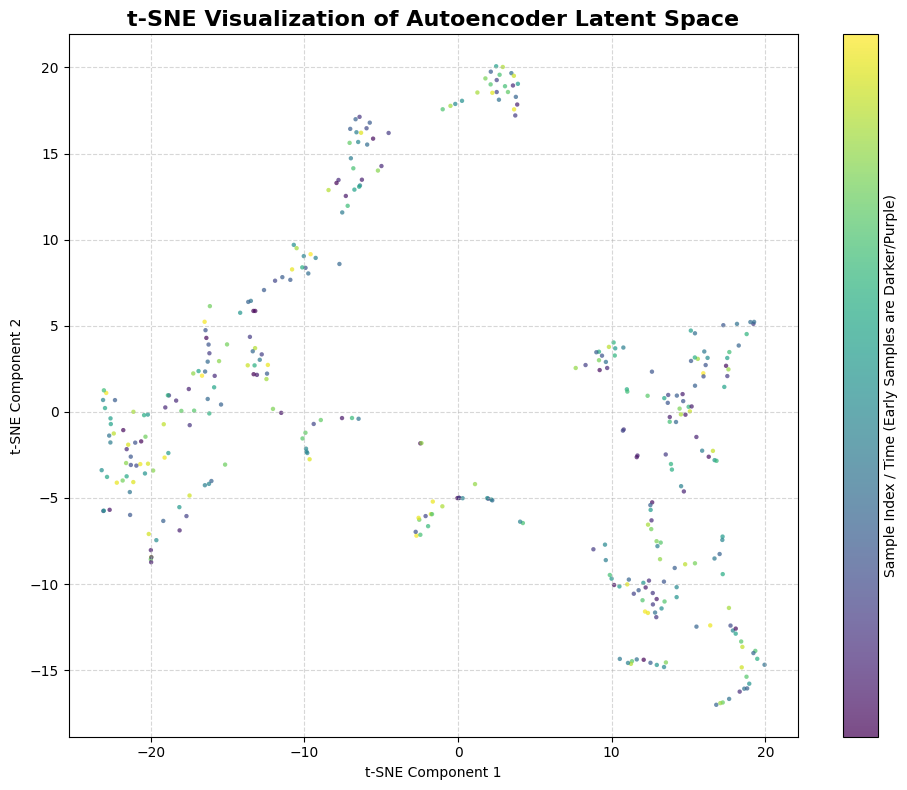

t-SNE visualization displayed successfully.


In [24]:
print(latent_data.shape)
tsne = TSNE(n_components=2, perplexity=30, random_state=42, n_jobs=-1)
# Fit and transform the data
tsne_results = tsne.fit_transform(latent_data)
indices = np.arange(tsne_results.shape[0])
# Plotting the results
plt.figure(figsize=(10, 8))
# Scatter plot of the 2D t-SNE results
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], 
            c=np.random.rand(tsne_results.shape[0]), # Use random colors for generic data
            cmap='viridis', 
            s=10, 
            alpha=0.7,
            edgecolors='none') 

plt.colorbar(label='Sample Index / Time (Early Samples are Darker/Purple)', 
                     ticks=[indices.min(), indices.max()])
plt.title('t-SNE Visualization of Autoencoder Latent Space', fontsize=16, fontweight='bold')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
print("t-SNE visualization displayed successfully.")